# Setp 0: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setp 1: Load Dataset

In [2]:
df = pd.read_csv("vgsales-12-4-2019.csv")

In [3]:
df3 = df.copy()

In [4]:
df.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


In [5]:
df.isna().sum()/df.shape[0]*100

Rank                0.000000
Name                0.000000
basename            0.000000
Genre               0.000000
ESRB_Rating        57.658804
Platform            0.000000
Publisher           0.000000
Developer           0.030470
VGChartz_Score    100.000000
Critic_Score       88.285059
User_Score         99.399555
Total_Shipped      96.725337
Global_Sales       65.201104
NA_Sales           76.763694
PAL_Sales          76.360410
JP_Sales           87.376326
Other_Sales        72.178807
Year                1.754732
Last_Update        83.535274
url                 0.000000
status              0.000000
Vgchartzscore      98.567895
img_url             0.000000
dtype: float64

In [6]:
df.shape[0]*(100-65.20)/100

19415.615999999998

# Setp 2: Clean Dataset

### A. Columns

### To Call specified columns
df.columns =['genre', 'esrb_rating', 'platform', 'publisher',
       'developer', 'critic_score', 'global_sales', 'year]

### To Drop specified columns
df2.drop( columns = ['img_url','NA_Sales','PAL_Sales','JP_Sales', ....], inplace=True )

In [7]:
# Drop these columns

df3.drop( columns = ['Rank', 'status','VGChartz_Score','User_Score',
                     'Total_Shipped','NA_Sales','PAL_Sales',
                     'JP_Sales','Other_Sales',
                     'Last_Update','url','Vgchartzscore','img_url'], inplace=True )

In [8]:
# To make the columns lower case

df3.columns = df3.columns.str.lower()

In [9]:
# To show columns after modify

df3.columns

Index(['name', 'basename', 'genre', 'esrb_rating', 'platform', 'publisher',
       'developer', 'critic_score', 'global_sales', 'year'],
      dtype='object')

### B. Rows (Cells)

In [10]:
# To check duplicate rows

print('The count of duplicated is: ' , df.duplicated().sum())

The count of duplicated is:  0


In [11]:
# To shape DataFream

df3.shape

(55792, 10)

In [12]:
df3.isna().sum()

name                0
basename            0
genre               0
esrb_rating     32169
platform            0
publisher           0
developer          17
critic_score    49256
global_sales    36377
year              979
dtype: int64

In [13]:
# To Drop null value

df3 = df3.replace([ ' ','NaN', 'Na','NA', '#', '?', '/'], np.nan)

In [14]:
# To Drop null value 

df3.dropna(inplace= True )

In [15]:
# To check the missing value by %

(df3.isna().sum()/df3.shape[0])*100
#print('{:.2f}',(df3.isna().sum()/df3.shape[0])*100)

name            0.0
basename        0.0
genre           0.0
esrb_rating     0.0
platform        0.0
publisher       0.0
developer       0.0
critic_score    0.0
global_sales    0.0
year            0.0
dtype: float64

In [16]:
df3.shape

(4170, 10)

In [17]:
# To check the missing value

df3.isna().sum()

name            0
basename        0
genre           0
esrb_rating     0
platform        0
publisher       0
developer       0
critic_score    0
global_sales    0
year            0
dtype: int64

In [18]:
df3.head(1)

,name,basename,genre,esrb_rating,platform,publisher,developer,critic_score,global_sales,year
19,Grand Theft Auto V,grand-theft-auto-v,Action,M,PS3,Rockstar Games,Rockstar North,9.4,20.32,2013.0


In [19]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4170 entries, 19 to 21241
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          4170 non-null   object 
 1   basename      4170 non-null   object 
 2   genre         4170 non-null   object 
 3   esrb_rating   4170 non-null   object 
 4   platform      4170 non-null   object 
 5   publisher     4170 non-null   object 
 6   developer     4170 non-null   object 
 7   critic_score  4170 non-null   float64
 8   global_sales  4170 non-null   float64
 9   year          4170 non-null   float64
dtypes: float64(3), object(7)
memory usage: 358.4+ KB


In [20]:
df3.dtypes

name             object
basename         object
genre            object
esrb_rating      object
platform         object
publisher        object
developer        object
critic_score    float64
global_sales    float64
year            float64
dtype: object

# Step 3 :EDA

The Target Column will be global_sales

<AxesSubplot:xlabel='year', ylabel='count'>

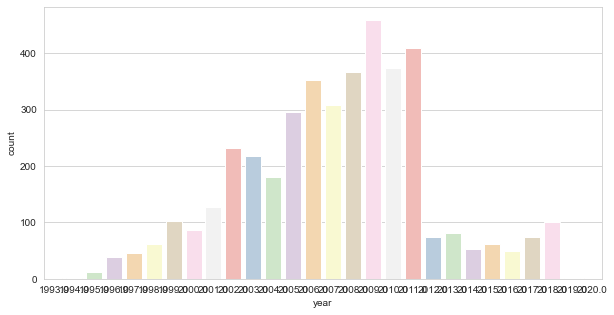

In [21]:
plt.figure(figsize=[10,5])
sns.set_style('whitegrid')
sns.countplot( x = 'year', data = df3, palette = 'Pastel1' )

<AxesSubplot:xlabel='genre', ylabel='count'>

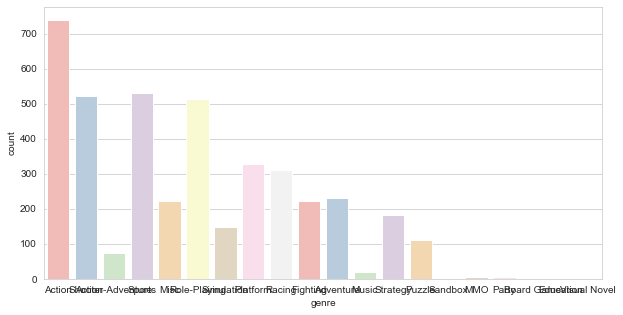

In [22]:
plt.figure(figsize=[10,5])
sns.set_style('whitegrid')
sns.countplot( x = 'genre', data = df3, palette = 'Pastel1' )

<AxesSubplot:xlabel='esrb_rating', ylabel='count'>

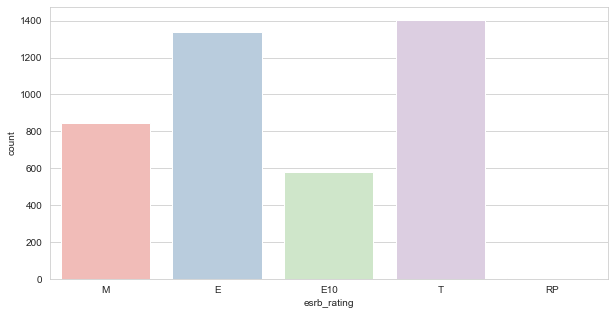

In [23]:
plt.figure(figsize=[10,5])
sns.set_style('whitegrid')
sns.countplot( x = 'esrb_rating', data = df3, palette = 'Pastel1' )

<AxesSubplot:xlabel='platform', ylabel='count'>

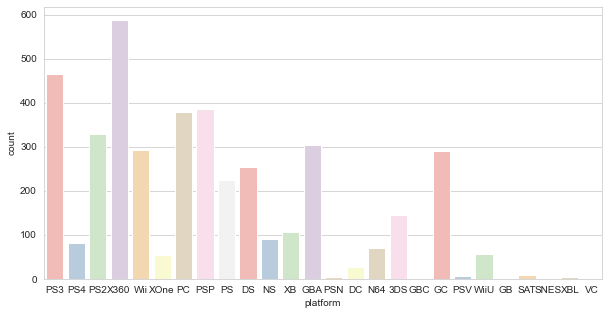

In [24]:
plt.figure(figsize=[10,5])
sns.set_style('whitegrid')
sns.countplot( x = 'platform', data = df3, palette = 'Pastel1' )

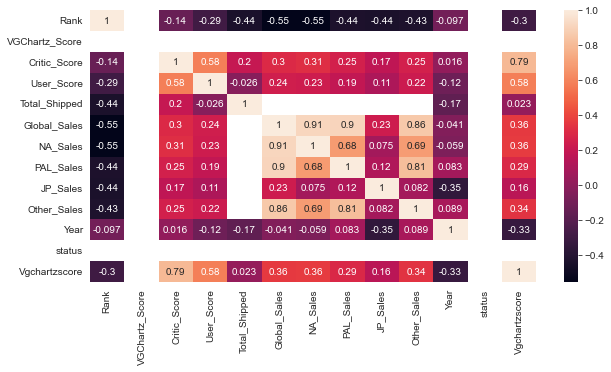

In [25]:
plt.figure(figsize=[10,5])
correct = df.corr()
sns.heatmap(correct, annot=True);

In [26]:
df3.describe()

,critic_score,global_sales,year
count,4170.000000,4170.000000,4170.000000
mean,7.150048,0.767067,2007.183453
std,1.422944,1.394742,4.690177
min,1.000000,0.000000,1993.000000
25%,6.400000,0.120000,2004.000000
50%,7.400000,0.320000,2008.000000
75%,8.200000,0.790000,2010.000000
max,10.000000,20.320000,2020.000000


In [27]:
df3.describe(exclude = 'number')

,name,basename,genre,esrb_rating,platform,publisher,developer
count,4170,4170,4170,4170,4170,4170,4170
unique,2938,2923,20,5,26,206,1043
top,Ratatouille,ratatouille,Action,T,X360,Electronic Arts,EA Canada
freq,9,9,739,1404,588,333,98


In [28]:
df3.platform.describe()

count     4170
unique      26
top       X360
freq       588
Name: platform, dtype: object

In [29]:
df3.genre.describe()

count       4170
unique        20
top       Action
freq         739
Name: genre, dtype: object

# Step 4 :Model 

In [30]:
df4 = pd.get_dummies(df3.drop(columns = ['name', 'basename']), drop_first=True)

In [31]:
df4.columns

Index(['critic_score', 'global_sales', 'year', 'genre_Action-Adventure',
       'genre_Adventure', 'genre_Board Game', 'genre_Education',
       'genre_Fighting', 'genre_MMO', 'genre_Misc',
       ...
       'developer_id Software', 'developer_id Software / Raven Software',
       'developer_imageepoch Inc.', 'developer_n-Space',
       'developer_neo Software', 'developer_skip Ltd.', 'developer_syn Sophia',
       'developer_tri-Ace', 'developer_tri-Crescendo / Monolith Soft',
       'developer_zSlide'],
      dtype='object', length=1298)

In [32]:
from sklearn.model_selection import train_test_split

x =df4.drop(columns = 'global_sales')
y = df3.global_sales

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [34]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [35]:
y_pred = lr.predict(x_test_scaled)

In [36]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

print(r2_score(y_test, y_pred)*100)
print(mean_absolute_percentage_error(y_test, y_pred)*100)

-1.5163445704581265e+30
7.614262305759004e+29


In [41]:
# applay Random Forest
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
rf.fit(x_train_scaled,y_train)

RandomForestRegressor()

In [38]:
y_pred_rf= rf.predict(x_test_scaled)

In [39]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

print(r2_score(y_test, y_pred_rf)*100)
print(mean_absolute_percentage_error(y_test, y_pred_rf)*100)

35.137807122953326
4390685636713176.0


In [40]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train_scaled,y_train)

ValueError: Unknown label type: 'continuous'

In [42]:
y_pred_knn = knn.predict(x_test_scaled)

AttributeError: 'KNeighborsClassifier' object has no attribute 'effective_metric_'

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_pred_knn,y_test))

NameError: name 'y_pred_knn' is not defined